<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Mini_Project_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info>=(3,5)

import sklearn
assert sklearn.__version__>="0.20"

import numpy as np
import pandas as pd
import random
import os
np.random.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

PROJECT_ROOT_DIR=" "
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_first(fig_id,tight_layout=True,fig_extension="png",resolution=300):
  path=os.path.join(IMAGES_PATH,fig_id + "," + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from google.colab import files
import io
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
uploaded=files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
df=pd.read_csv('titanic.csv')
df=df.drop(columns='Cabin', axis=1)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
df=df.drop(columns=['PassengerId','Name','Ticket'],axis=1)
print(df.isnull().sum())
print(df)
df.dtypes


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.000000      1      0   7.2500         0
1           1       1    1  38.000000      1      0  71.2833         1
2           1       3    1  26.000000      0      0   7.9250         0
3           1       1    1  35.000000      1      0  53.1000         0
4           0       3    0  35.000000      0      0   8.0500         0
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    0  27.000000      0      0  13.0000         0
887         1       1    1  19.000000      0      0  30.0000         0
888         0       3    1  29.699118      1      2  23.4500         0
889         1       1    0  26.000000      0      0  30.0000         1
890         0       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns]

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [ ]:
X=df.drop(columns='Survived', axis=1)
y=df['Survived']

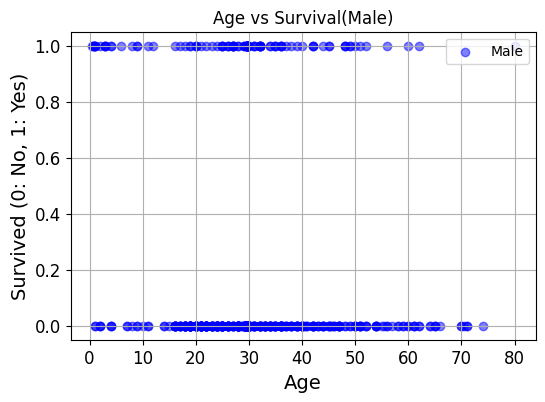

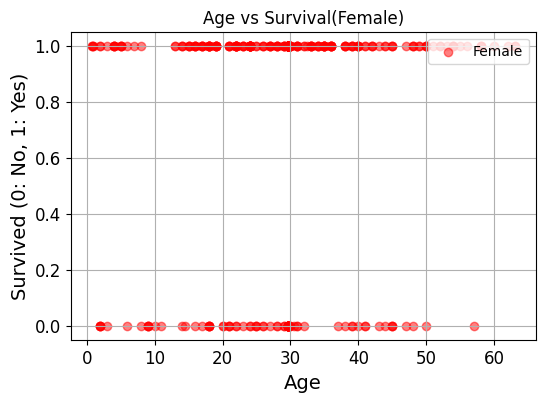

In [ ]:
df_male = df[df['Sex'] == 0]
df_female = df[df['Sex'] == 1]
plt.figure(figsize=(6, 4))
plt.scatter(df_male['Age'], df_male['Survived'], c='blue', label='Male', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Survived (0: No, 1: Yes)')
plt.title('Age vs Survival(Male)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(df_female['Age'], df_female['Survived'], c='red', label='Female', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Survived (0: No, 1: Yes)')
plt.title('Age vs Survival(Female)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



<Figure size 1600x1000 with 0 Axes>

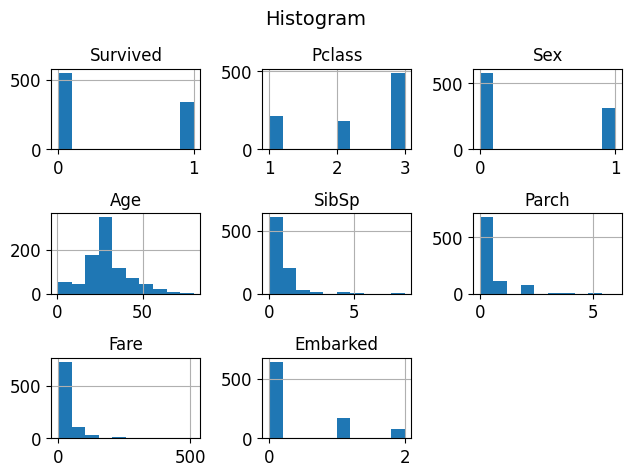

In [ ]:
plt.figure(figsize=(16,10))
df.hist()
plt.suptitle("Histogram", fontsize=14)
plt.tight_layout(pad=1)
plt.show()

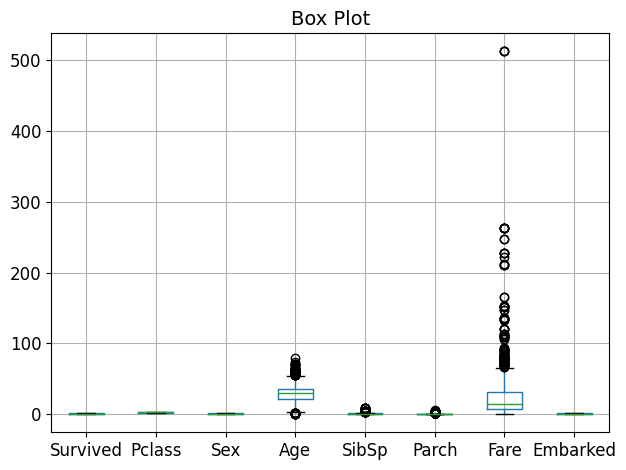

In [ ]:
df.boxplot()
plt.title("Box Plot", fontsize = 14)
plt.tight_layout()
plt.show()

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.069809 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.331339  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.084153  0.114631  0.245489   
Age      -0.069809 -0.331339 -0.084153  1.000000 -0.232625 -0.179191   
SibSp    -0.035322  0.083081  0.114631 -0.232625  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.179191  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.091566  0.159651  0.216225   
Embarked  0.106811  0.045702  0.116569  0.007461 -0.059961 -0.078665   

              Fare  Embarked  
Survived  0.257307  0.106811  
Pclass   -0.549500  0.045702  
Sex       0.182333  0.116569  
Age       0.091566  0.007461  
SibSp     0.159651 -0.059961  
Parch     0.216225 -0.078665  
Fare      1.000000  0.062142  
Embarked  0.062142  1.000000  


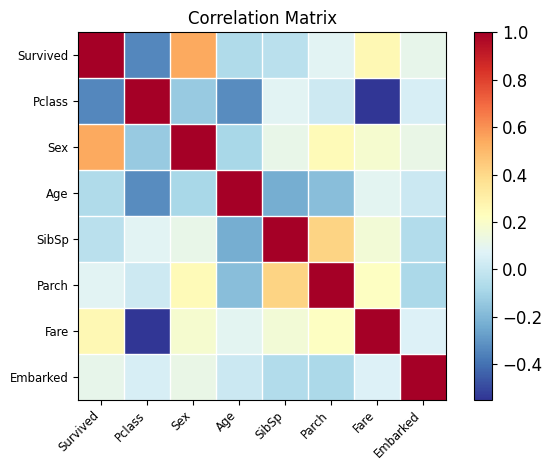

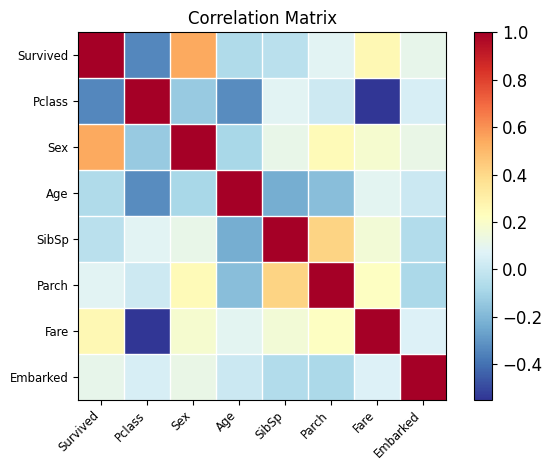

In [ ]:
corr=df.corr()
print(corr)
sm.graphics.plot_corr(corr,xnames=list(corr.columns))

Text(0.5, 0.98, 'Pair Plot')

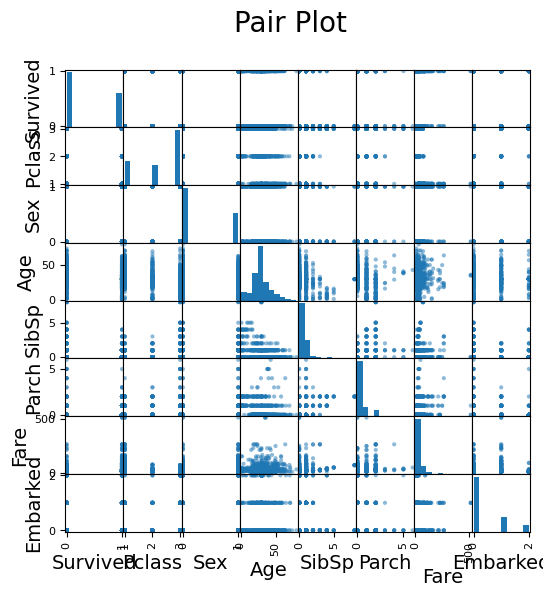

In [ ]:
scatter_matrix(df,figsize=(6,6))
plt.suptitle("Pair Plot", fontsize=20)

In [ ]:
model=LogisticRegression()
model=model.fit(X,y)
model.score(X,y)

0.8047138047138047

In [ ]:
df['Predicted_Survival']=model.predict(X)
print("Predicted Probability: ", model.predict_proba(X)[:,1])
print("Predicted Class: ", model.predict(X))

Predicted Probability:  [0.09242297 0.9070239  0.61958161 0.89052658 0.07783577 0.14790947
 0.28109655 0.10097595 0.5740563  0.88430105 0.72553209 0.8102433
 0.13190674 0.03598021 0.72270904 0.61235396 0.12185828 0.23763636
 0.49894645 0.6450326  0.20708091 0.20845671 0.80712801 0.51030287
 0.54632819 0.34496611 0.11813973 0.45415324 0.70160962 0.0940871
 0.45229015 0.94167558 0.70154545 0.06949913 0.5220249  0.31253802
 0.11814076 0.12748307 0.54621835 0.71140348 0.40680565 0.776713
 0.1183056  0.91169236 0.78148163 0.09411828 0.11361845 0.70154545
 0.06813452 0.62359619 0.06548765 0.12741712 0.86525079 0.7649629
 0.2370524  0.49365563 0.85529959 0.12312582 0.87730317 0.03929275
 0.15337237 0.91390434 0.30339036 0.08886995 0.55288066 0.08394332
 0.8120262  0.13649019 0.35505477 0.05965085 0.22066519 0.31320846
 0.33598967 0.10266621 0.0962482  0.1109449  0.0940871  0.09411828
 0.46157941 0.58462459 0.1234303  0.0967809  0.70156408 0.51717641
 0.87364344 0.32573751 0.09783219 0.0941182

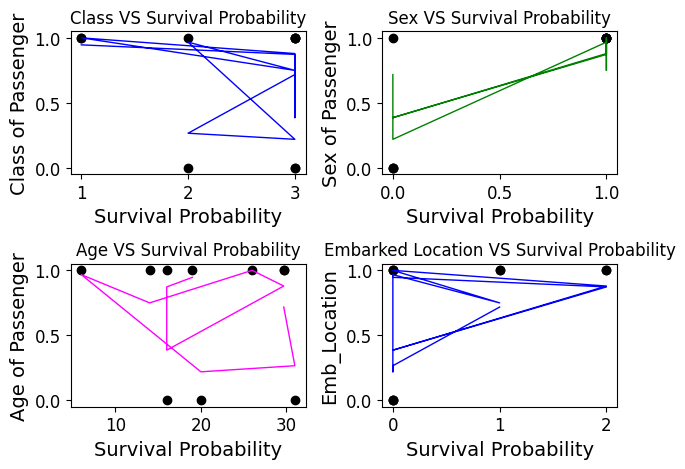

In [ ]:
df_sample=df.sample(n=10)
X_sample=df_sample.drop(columns='Survived')
y_sample=df_sample['Survived']
model_sample=LogisticRegression()
model_sample=model_sample.fit(X_sample,y_sample)
plt.subplot(2,2,1)
plt.scatter(df_sample.Pclass,y_sample,color='black')
plt.plot(df_sample.Pclass,model_sample.predict_proba(X_sample)[:,1],color='blue',linewidth=1)
plt.title("Class VS Survival Probability")
plt.ylabel("Class of Passenger")
plt.xlabel("Survival Probability")
plt.subplot(2,2,2)
plt.scatter(df_sample.Sex,y_sample,color='black')
plt.plot(df_sample.Sex,model_sample.predict_proba(X_sample)[:,1],color='green',linewidth=1)
plt.title("Sex VS Survival Probability")
plt.ylabel("Sex of Passenger")
plt.xlabel("Survival Probability")
plt.subplot(2,2,3)
plt.scatter(df_sample.Age,y_sample,color='black')
plt.plot(df_sample.Age,model_sample.predict_proba(X_sample)[:,1],color='magenta',linewidth=1)
plt.title("Age VS Survival Probability")
plt.ylabel("Age of Passenger")
plt.xlabel("Survival Probability")
plt.subplot(2,2,4)
plt.scatter(df_sample.Embarked,y_sample,color='black')
plt.plot(df_sample.Embarked,model_sample.predict_proba(X_sample)[:,1],color='blue',linewidth=1)
plt.title("Embarked Location VS Survival Probability")
plt.ylabel("Emb_Location")
plt.xlabel("Survival Probability")
plt.subplots_adjust(top=2.0)
plt.tight_layout()


In [ ]:
print("Accuracy: ", metrics.accuracy_score(y,model.predict(X)))

Accuracy:  0.8047138047138047


In [ ]:
print("AUC: ", metrics.roc_auc_score(y,model.predict_proba(X)[:,1]))

AUC:  0.8566212891061897


In [ ]:
print("Confusion matrix: ", metrics.confusion_matrix(y, model.predict(X)))

Confusion matrix:  [[475  74]
 [100 242]]


In [ ]:
print("Classification Report: ", metrics.classification_report(y,model.predict(X)))

Classification Report:                precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.71      0.74       342

    accuracy                           0.80       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



In [ ]:
fpr,tpr,_=metrics.roc_curve(y,model.predict_proba(X)[:,1])
roc_auc=metrics.auc(fpr,tpr)
print("ROC AUC: %0.2f"%roc_auc)

ROC AUC: 0.86


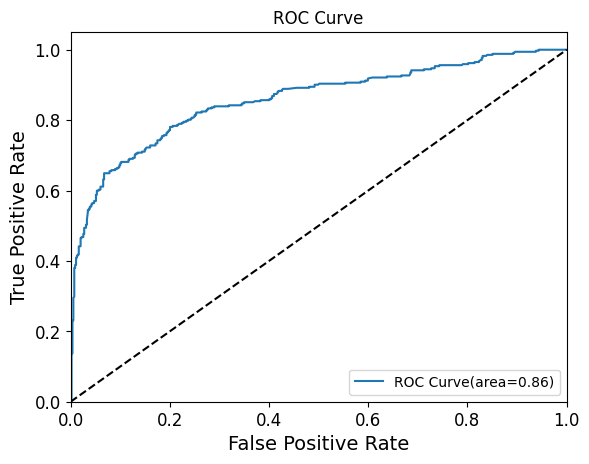

In [ ]:
plt.figure()
plt.plot(fpr,tpr,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

In [ ]:
#Lasso
scaler=StandardScaler()
X_std=scaler.fit_transform(X)
lasso_model=LogisticRegression(C=10,penalty='l1',solver='liblinear')
lasso_model=lasso_model.fit(X_std,y)
lasso_model.score(X_std,y)

0.8024691358024691

In [ ]:
#ridge
ridge_model=LogisticRegression(C=100,penalty='l2',solver='lbfgs')
ridge_model=ridge_model.fit(X_std,y)
ridge_model.score(X_std,y)

0.8024691358024691